# Exemplo de rede neural MLP e Convolucional com Keras

## Importando as bibliotecas

In [1]:
import keras

/home/pedro/anaconda3/envs/Neurais2/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

## Fazendo o download dos dados

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Analisando os dados

In [4]:
import matplotlib.pyplot as plt

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

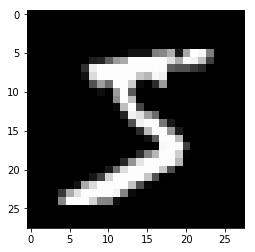

In [8]:
plt.imshow(train_images[0], cmap='gray')

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

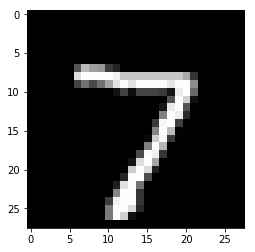

In [12]:
plt.imshow(test_images[0], cmap='gray')

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Normalizando os dados

In [14]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [15]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Entrada da MLP

In [16]:
train_images_mlp = train_images.reshape((60000, 28 * 28))
test_images_mlp = test_images.reshape((10000, 28 * 28))

In [17]:
train_images_mlp.shape

(60000, 784)

### Entrada da rede convolucional

In [18]:
from keras import backend as K

In [19]:
img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [20]:
print('input shape:', input_shape)

input shape: (28, 28, 1)


### Transformando rótulos em dados categóricos

In [21]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

model: https://keras.io/models/model/

layers: https://keras.io/layers/about-keras-layers/

In [23]:
from keras import models
from keras import layers

# Rede 1: MLP 2 camadas

In [24]:
#definindo a rede 
#model: https://keras.io/models/model/
#layers: https://keras.io/layers/about-keras-layers/

network1 = models.Sequential()
network1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network1.add(layers.Dense(10, activation='softmax'))

In [25]:
network1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
#paraleliza o modelo para treinamento em 2 GPUs
network1 = keras.utils.multi_gpu_model(network1,gpus=2)

In [27]:
#compilando e treinando rede
#optimizers: https://keras.io/optimizers/
#loss funcitons: https://keras.io/losses/
#metrics: https://keras.io/metrics/

network1.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_mlp = network1.fit(train_images_mlp, train_labels, epochs=140, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 2s 50us/step - loss: 1.2154 - acc: 0.7188 - val_loss: 0.6776 - val_acc: 0.8569
Epoch 2/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.5892 - acc: 0.8607 - val_loss: 0.4738 - val_acc: 0.8874
Epoch 3/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.4651 - acc: 0.8819 - val_loss: 0.4031 - val_acc: 0.8998
Epoch 4/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.4097 - acc: 0.8923 - val_loss: 0.3651 - val_acc: 0.9042
Epoch 5/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.3766 - acc: 0.8988 - val_loss: 0.3409 - val_acc: 0.9087
Epoch 6/140
48000/48000 [==============================] - 2s 40us/step - loss: 0.3536 - acc: 0.9032 - val_loss: 0.3236 - val_acc: 0.9120
Epoch 7/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.3357 - acc: 0.9081 - val_loss: 0.3101 - 

Epoch 118/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.0743 - acc: 0.9810 - val_loss: 0.1041 - val_acc: 0.9711
Epoch 119/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.0737 - acc: 0.9812 - val_loss: 0.1035 - val_acc: 0.9717
Epoch 120/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.0732 - acc: 0.9813 - val_loss: 0.1033 - val_acc: 0.9715
Epoch 121/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.0726 - acc: 0.9815 - val_loss: 0.1031 - val_acc: 0.9715
Epoch 122/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.0720 - acc: 0.9816 - val_loss: 0.1028 - val_acc: 0.9718
Epoch 123/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.0714 - acc: 0.9816 - val_loss: 0.1021 - val_acc: 0.9717
Epoch 124/140
48000/48000 [==============================] - 2s 41us/step - loss: 0.0709 - acc: 0.9818 - val_loss: 0.1017 - val_acc: 0.9715
Epoch 125/140
48000/

In [28]:
#funcao que avalia a rede e retorna seus erros
def Avalia(hist,net,test_img,test_lab, i):#i:usado com early stopping, para selecionar a rede certa, 1 se nao for usado early stopping
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'b--', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'b--', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
    test_loss, test_acc = net.evaluate(test_img, test_lab)
    print('test acc=', test_acc)
    print('training accuracy=',hist.history['acc'][-i])
    print('validation accuracy=',hist.history['val_acc'][-i])
    print('test err=', test_loss)
    print('training err=',hist.history['loss'][-i])
    print('validation err=',hist.history['val_loss'][-i])


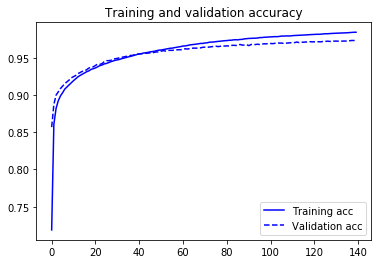

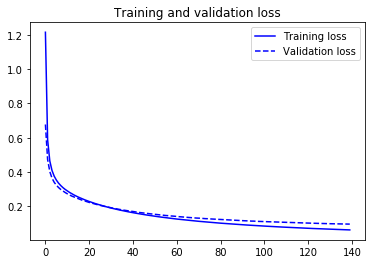

10000/10000 [==============================] - 1s 61us/step
test acc= 0.9747
training accuracy= 0.9843958333333334
validation accuracy= 0.973
test err= 0.08827327094227076
training err= 0.06306640438735485
validation err= 0.0968948900004228


In [29]:
Avalia(history_mlp,network1,test_images_mlp,test_labels,1)

# Rede 2: Convolucional 7 camadas

In [31]:
#definindo rede
network2 = models.Sequential()
network2.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
network2.add(layers.Conv2D(64, (3, 3), activation='relu'))
network2.add(layers.Conv2D(64, (3, 3), activation='relu'))
network2.add(layers.Conv2D(64, (3, 3), activation='relu'))
network2.add(layers.Flatten())
network2.add(layers.Dense(128, activation='relu'))
network2.add(layers.Dense(64, activation='relu'))
network2.add(layers.Dense(10, activation='softmax'))

In [32]:
network2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3276928   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
__________

In [33]:
network2 = keras.utils.multi_gpu_model(network2,gpus=2) #paralelizando a rede para treinamento em 2 GPUs

In [34]:
#Compilando rede
network2.compile(optimizer='sgd',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [35]:
#treinando rede
history = network2.fit(train_images, train_labels,
                      batch_size=128,
                      epochs=140,
                      validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 7s 149us/step - loss: 0.7083 - acc: 0.7818 - val_loss: 0.2191 - val_acc: 0.9374
Epoch 2/140
48000/48000 [==============================] - 6s 123us/step - loss: 0.2195 - acc: 0.9349 - val_loss: 0.1630 - val_acc: 0.9512
Epoch 3/140
48000/48000 [==============================] - 6s 123us/step - loss: 0.1637 - acc: 0.9520 - val_loss: 0.1560 - val_acc: 0.9563
Epoch 4/140
48000/48000 [==============================] - 6s 123us/step - loss: 0.1337 - acc: 0.9604 - val_loss: 0.1154 - val_acc: 0.9672
Epoch 5/140
48000/48000 [==============================] - 6s 123us/step - loss: 0.1112 - acc: 0.9669 - val_loss: 0.1086 - val_acc: 0.9672
Epoch 6/140
48000/48000 [==============================] - 6s 123us/step - loss: 0.0983 - acc: 0.9700 - val_loss: 0.0984 - val_acc: 0.9713
Epoch 7/140
48000/48000 [==============================] - 6s 123us/step - loss: 0.0868 - acc: 0.9738 - val_loss: 0.

Epoch 115/140
48000/48000 [==============================] - 6s 122us/step - loss: 3.6206e-05 - acc: 1.0000 - val_loss: 0.1285 - val_acc: 0.9821
Epoch 116/140
48000/48000 [==============================] - 6s 122us/step - loss: 3.5923e-05 - acc: 1.0000 - val_loss: 0.1286 - val_acc: 0.9821
Epoch 117/140
48000/48000 [==============================] - 6s 122us/step - loss: 3.5343e-05 - acc: 1.0000 - val_loss: 0.1286 - val_acc: 0.9823
Epoch 118/140
48000/48000 [==============================] - 6s 122us/step - loss: 3.4765e-05 - acc: 1.0000 - val_loss: 0.1289 - val_acc: 0.9822
Epoch 119/140
48000/48000 [==============================] - 6s 122us/step - loss: 3.4600e-05 - acc: 1.0000 - val_loss: 0.1289 - val_acc: 0.9822
Epoch 120/140
48000/48000 [==============================] - 6s 122us/step - loss: 3.4028e-05 - acc: 1.0000 - val_loss: 0.1290 - val_acc: 0.9821
Epoch 121/140
48000/48000 [==============================] - 6s 122us/step - loss: 3.3456e-05 - acc: 1.0000 - val_loss: 0.1292 - v

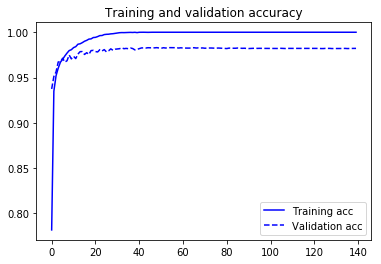

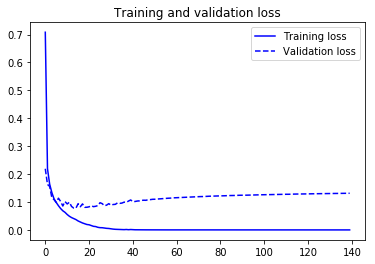

10000/10000 [==============================] - 2s 172us/step
test acc= 0.9822
training accuracy= 1.0
validation accuracy= 0.9821666668256124
test err= 0.1251584162220022
training err= 2.685475903323701e-05
validation err= 0.13133609068408775


In [36]:
#avaliando rede
Avalia(history,network2,test_images,test_labels,1)

# Rede 3: Convolucional com MaxPooling

In [38]:
#Definindo rede
network3 = models.Sequential()
network3.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
network3.add(layers.Conv2D(64, (3, 3), activation='relu'))
network3.add(layers.Conv2D(64, (3, 3), activation='relu'))
network3.add(layers.MaxPooling2D(pool_size=(2, 2)))
network3.add(layers.Conv2D(64, (3, 3), activation='relu'))
network3.add(layers.MaxPooling2D(pool_size=(2, 2)))
network3.add(layers.Flatten())
network3.add(layers.Dense(128, activation='relu'))
network3.add(layers.Dense(64, activation='relu'))
network3.add(layers.Dense(10, activation='softmax'))

network3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

In [39]:
#compilando e treinando
network3 = keras.utils.multi_gpu_model(network3,gpus=2)

network3.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

history3=network3.fit(train_images, train_labels,
                      batch_size=128,
                      epochs=140,
                      validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 5s 98us/step - loss: 1.5170 - acc: 0.5021 - val_loss: 0.7682 - val_acc: 0.7715
Epoch 2/140
48000/48000 [==============================] - 5s 96us/step - loss: 0.2989 - acc: 0.9089 - val_loss: 0.1927 - val_acc: 0.9445
Epoch 3/140
48000/48000 [==============================] - 5s 96us/step - loss: 0.1820 - acc: 0.9449 - val_loss: 0.1424 - val_acc: 0.9587
Epoch 4/140
48000/48000 [==============================] - 5s 95us/step - loss: 0.1367 - acc: 0.9593 - val_loss: 0.1222 - val_acc: 0.9649
Epoch 5/140
48000/48000 [==============================] - 5s 95us/step - loss: 0.1113 - acc: 0.9664 - val_loss: 0.0997 - val_acc: 0.9709
Epoch 6/140
48000/48000 [==============================] - 5s 94us/step - loss: 0.0971 - acc: 0.9704 - val_loss: 0.0917 - val_acc: 0.9721
Epoch 7/140
48000/48000 [==============================] - 5s 95us/step - loss: 0.0867 - acc: 0.9737 - val_loss: 0.0823 - 

48000/48000 [==============================] - 5s 94us/step - loss: 1.1307e-04 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9867
Epoch 117/140
48000/48000 [==============================] - 5s 95us/step - loss: 1.1120e-04 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9866
Epoch 118/140
48000/48000 [==============================] - 5s 94us/step - loss: 1.0864e-04 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9867
Epoch 119/140
48000/48000 [==============================] - 5s 94us/step - loss: 1.0782e-04 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9867
Epoch 120/140
48000/48000 [==============================] - 4s 93us/step - loss: 1.0607e-04 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9869
Epoch 121/140
48000/48000 [==============================] - 5s 94us/step - loss: 1.0347e-04 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9869
Epoch 122/140
48000/48000 [==============================] - 4s 93us/step - loss: 1.0123e-04 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9870
Epoch 

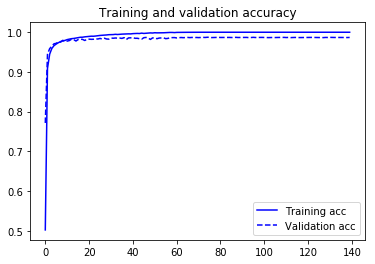

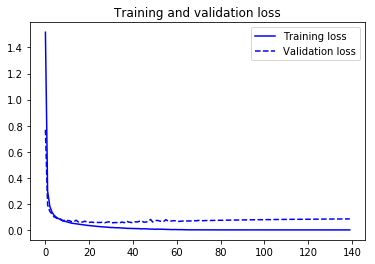

10000/10000 [==============================] - 1s 84us/step
test acc= 0.9875
training accuracy= 1.0
validation accuracy= 0.9869166665077209
test err= 0.06799678473660249
training err= 7.754406777651941e-05
validation err= 0.08442384547831004


In [40]:
#avaliando rede
Avalia(history3,network3,test_images,test_labels,1)

# Rede 4: Convolucional com MaxPooling e Dropout

In [42]:
#Definindo rede
network4 = models.Sequential()
network4.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',input_shape=input_shape))
network4.add(layers.Conv2D(64, (3, 3), activation='relu'))
network4.add(layers.Conv2D(64, (3, 3), activation='relu'))
network4.add(layers.MaxPooling2D(pool_size=(2, 2)))
network4.add(layers.Conv2D(64, (3, 3), activation='relu'))
network4.add(layers.MaxPooling2D(pool_size=(2, 2)))
network4.add(layers.Dropout(0.25))
network4.add(layers.Flatten())
network4.add(layers.Dense(128, activation='relu'))
network4.add(layers.Dropout(0.5))
network4.add(layers.Dense(64, activation='relu'))
network4.add(layers.Dropout(0.5))
network4.add(layers.Dense(10, activation='softmax'))

network4.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

In [43]:
#compilando e treinando
network4 = keras.utils.multi_gpu_model(network4,gpus=2)

network4.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

history4=network4.fit(train_images, train_labels,
                      batch_size=128,
                      epochs=140,
                      validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 5s 107us/step - loss: 2.2324 - acc: 0.1829 - val_loss: 1.8721 - val_acc: 0.4985
Epoch 2/140
48000/48000 [==============================] - 5s 103us/step - loss: 1.6359 - acc: 0.4259 - val_loss: 0.6838 - val_acc: 0.8683
Epoch 3/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.9745 - acc: 0.6725 - val_loss: 0.3309 - val_acc: 0.9255
Epoch 4/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.6860 - acc: 0.7782 - val_loss: 0.2157 - val_acc: 0.9442
Epoch 5/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.5298 - acc: 0.8337 - val_loss: 0.1628 - val_acc: 0.9568
Epoch 6/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.4481 - acc: 0.8643 - val_loss: 0.1346 - val_acc: 0.9615
Epoch 7/140
48000/48000 [==============================] - 5s 104us/step - loss: 0.3863 - acc: 0.8842 - val_loss: 0.

48000/48000 [==============================] - 5s 103us/step - loss: 0.0434 - acc: 0.9885 - val_loss: 0.0361 - val_acc: 0.9922
Epoch 118/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.0386 - acc: 0.9902 - val_loss: 0.0350 - val_acc: 0.9926
Epoch 119/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.0437 - acc: 0.9885 - val_loss: 0.0363 - val_acc: 0.9923
Epoch 120/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.0402 - acc: 0.9891 - val_loss: 0.0366 - val_acc: 0.9919
Epoch 121/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.0418 - acc: 0.9889 - val_loss: 0.0373 - val_acc: 0.9921
Epoch 122/140
48000/48000 [==============================] - 5s 104us/step - loss: 0.0425 - acc: 0.9894 - val_loss: 0.0376 - val_acc: 0.9913
Epoch 123/140
48000/48000 [==============================] - 5s 103us/step - loss: 0.0396 - acc: 0.9892 - val_loss: 0.0352 - val_acc: 0.9922
Epoch 124/140
48000/48000 [

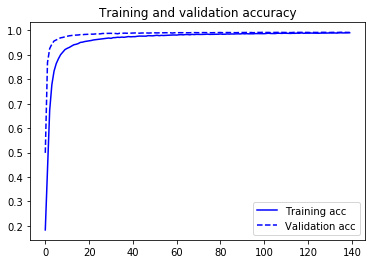

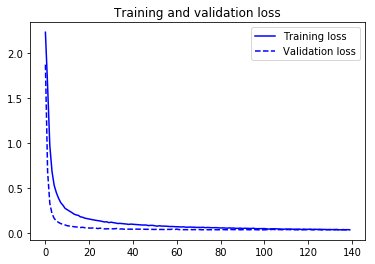

10000/10000 [==============================] - 1s 95us/step
test acc= 0.9946
training accuracy= 0.9907083333333333
validation accuracy= 0.9922499998410543
test err= 0.023490405937680953
training err= 0.035374769183186196
validation err= 0.03634200700823506


In [44]:
#avaliando rede
Avalia(history4,network4,test_images,test_labels,1)

# Rede 5: Convolucional com MaxPooling, Dropout e Weight Decay (norma L2)

In [46]:
#Definindo rede
network5 = models.Sequential()
network5.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',input_shape=input_shape))
network5.add(layers.Conv2D(64, (3, 3), activation='relu'))
network5.add(layers.Conv2D(64, (3, 3), activation='relu'))
network5.add(layers.MaxPooling2D(pool_size=(2, 2)))
network5.add(layers.Conv2D(64, (3, 3), activation='relu'))
network5.add(layers.MaxPooling2D(pool_size=(2, 2)))
network5.add(layers.Dropout(0.25))
network5.add(layers.Flatten())
network5.add(layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l2(0.0001)))
network5.add(layers.Dropout(0.5))
network5.add(layers.Dense(64, activation='relu', activity_regularizer=keras.regularizers.l2(0.0001)))
network5.add(layers.Dropout(0.5))
network5.add(layers.Dense(10, activation='softmax'))

network5.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)          0         
__________

In [47]:
#COMPILANDO
network5 = keras.utils.multi_gpu_model(network5,gpus=2)
network5.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [48]:
#TREINANDO

history5=network5.fit(train_images, train_labels,
                      batch_size=128,
                      epochs=140,
                      validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 5s 104us/step - loss: 2.2820 - acc: 0.1836 - val_loss: 2.2215 - val_acc: 0.5657
Epoch 2/140
48000/48000 [==============================] - 5s 98us/step - loss: 2.1258 - acc: 0.3287 - val_loss: 1.7159 - val_acc: 0.7405
Epoch 3/140
48000/48000 [==============================] - 5s 98us/step - loss: 1.6976 - acc: 0.5433 - val_loss: 1.1640 - val_acc: 0.8487
Epoch 4/140
48000/48000 [==============================] - 5s 98us/step - loss: 1.3627 - acc: 0.6817 - val_loss: 0.8856 - val_acc: 0.9082
Epoch 5/140
48000/48000 [==============================] - 5s 98us/step - loss: 1.1489 - acc: 0.7634 - val_loss: 0.7096 - val_acc: 0.9414
Epoch 6/140
48000/48000 [==============================] - 5s 98us/step - loss: 0.9985 - acc: 0.8151 - val_loss: 0.5907 - val_acc: 0.9540
Epoch 7/140
48000/48000 [==============================] - 5s 98us/step - loss: 0.8892 - acc: 0.8491 - val_loss: 0.5027 -

Epoch 118/140
48000/48000 [==============================] - 5s 98us/step - loss: 0.1529 - acc: 0.9891 - val_loss: 0.0969 - val_acc: 0.9930
Epoch 119/140
48000/48000 [==============================] - 5s 98us/step - loss: 0.1538 - acc: 0.9891 - val_loss: 0.0972 - val_acc: 0.9932
Epoch 120/140
48000/48000 [==============================] - 5s 98us/step - loss: 0.1515 - acc: 0.9890 - val_loss: 0.0964 - val_acc: 0.9930
Epoch 121/140
48000/48000 [==============================] - 5s 98us/step - loss: 0.1494 - acc: 0.9899 - val_loss: 0.0970 - val_acc: 0.9918
Epoch 122/140
48000/48000 [==============================] - 5s 97us/step - loss: 0.1504 - acc: 0.9900 - val_loss: 0.0936 - val_acc: 0.9923
Epoch 123/140
48000/48000 [==============================] - 5s 97us/step - loss: 0.1500 - acc: 0.9896 - val_loss: 0.0970 - val_acc: 0.9930
Epoch 124/140
48000/48000 [==============================] - 5s 97us/step - loss: 0.1488 - acc: 0.9892 - val_loss: 0.0952 - val_acc: 0.9926
Epoch 125/140
48000/

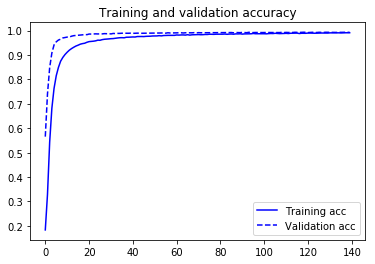

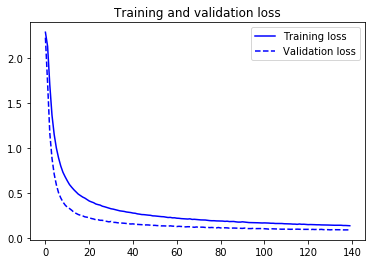

10000/10000 [==============================] - 1s 103us/step
test acc= 0.9947
training accuracy= 0.9911875
validation accuracy= 0.9928333331743876
test err= 0.03683618170768022
training err= 0.13717680968840917
validation err= 0.09076368876298269


In [49]:
#avaliando
Avalia(history5,network5,test_images,test_labels,1)

# Rede 6: Convolucional com MaxPooling, Dropout e Weight Decay (norma L2) maior que na rede anterior

In [51]:
#Definindo rede
network6 = models.Sequential()
network6.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',input_shape=input_shape))
network6.add(layers.Conv2D(64, (3, 3), activation='relu'))
network6.add(layers.Conv2D(64, (3, 3), activation='relu'))
network6.add(layers.MaxPooling2D(pool_size=(2, 2)))
network6.add(layers.Conv2D(64, (3, 3), activation='relu'))
network6.add(layers.MaxPooling2D(pool_size=(2, 2)))
network6.add(layers.Dropout(0.25))
network6.add(layers.Flatten())
network6.add(layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l2(0.005)))
network6.add(layers.Dropout(0.5))
network6.add(layers.Dense(64, activation='relu', activity_regularizer=keras.regularizers.l2(0.005)))
network6.add(layers.Dropout(0.5))
network6.add(layers.Dense(10, activation='softmax'))

network6.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)          0         
__________

In [52]:
#COMPILANDO
network6 = keras.utils.multi_gpu_model(network6,gpus=2)
network6.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [53]:
#TREINANDO
history6=network6.fit(train_images, train_labels,
                      batch_size=128,
                      epochs=140,
                      validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 5s 109us/step - loss: 2.3032 - acc: 0.1305 - val_loss: 2.2995 - val_acc: 0.1060
Epoch 2/140
48000/48000 [==============================] - 5s 100us/step - loss: 2.2993 - acc: 0.1141 - val_loss: 2.2973 - val_acc: 0.1060
Epoch 3/140
48000/48000 [==============================] - 5s 101us/step - loss: 2.2978 - acc: 0.1141 - val_loss: 2.2955 - val_acc: 0.1060
Epoch 4/140
48000/48000 [==============================] - 5s 101us/step - loss: 2.2966 - acc: 0.1143 - val_loss: 2.2939 - val_acc: 0.1060
Epoch 5/140
48000/48000 [==============================] - 5s 101us/step - loss: 2.2954 - acc: 0.1148 - val_loss: 2.2920 - val_acc: 0.1060
Epoch 6/140
48000/48000 [==============================] - 5s 101us/step - loss: 2.2943 - acc: 0.1154 - val_loss: 2.2900 - val_acc: 0.1060
Epoch 7/140
48000/48000 [==============================] - 5s 100us/step - loss: 2.2929 - acc: 0.1161 - val_loss: 2.

48000/48000 [==============================] - 5s 101us/step - loss: 0.7950 - acc: 0.9599 - val_loss: 0.5449 - val_acc: 0.9912
Epoch 118/140
48000/48000 [==============================] - 5s 100us/step - loss: 0.7891 - acc: 0.9594 - val_loss: 0.5421 - val_acc: 0.9902
Epoch 119/140
48000/48000 [==============================] - 5s 100us/step - loss: 0.7808 - acc: 0.9612 - val_loss: 0.5367 - val_acc: 0.9901
Epoch 120/140
48000/48000 [==============================] - 5s 100us/step - loss: 0.7781 - acc: 0.9598 - val_loss: 0.5324 - val_acc: 0.9912
Epoch 121/140
48000/48000 [==============================] - 5s 101us/step - loss: 0.7763 - acc: 0.9612 - val_loss: 0.5279 - val_acc: 0.9909
Epoch 122/140
48000/48000 [==============================] - 5s 101us/step - loss: 0.7695 - acc: 0.9600 - val_loss: 0.5253 - val_acc: 0.9910
Epoch 123/140
48000/48000 [==============================] - 5s 100us/step - loss: 0.7674 - acc: 0.9618 - val_loss: 0.5224 - val_acc: 0.9912
Epoch 124/140
48000/48000 [

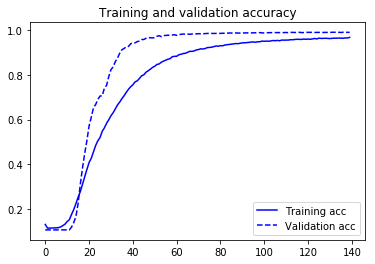

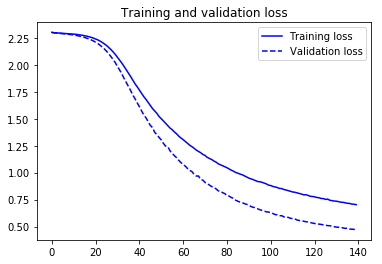

10000/10000 [==============================] - 1s 101us/step
test acc= 0.9927
training accuracy= 0.9684375
validation accuracy= 0.9910833331743876
test err= 0.2668167231321335
training err= 0.7030133541425069
validation err= 0.468558078845342


In [54]:
Avalia(history6,network6,test_images,test_labels,1)

# Rede 7: MLP de 4 camadas

In [75]:
#Observa-se que o MLP que foi feito (network1) teve underfitting, portanto, sera criado um MLP com mais capacidade

network7 = models.Sequential()
network7.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network7.add(layers.Dense(256, activation='relu'))
network7.add(layers.Dense(256, activation='relu'))
network7.add(layers.Dense(256, activation='relu'))
network7.add(layers.Dense(256, activation='relu'))
network7.add(layers.Dense(256, activation='relu'))
network7.add(layers.Dense(10, activation='softmax'))

In [76]:
network7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                2570      
Total para

In [77]:
#COMPILANDO
network7 = keras.utils.multi_gpu_model(network7,gpus=2)
network7.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [78]:
#TREINANDO

history7 = network7.fit(train_images_mlp, train_labels, epochs=140, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 3s 68us/step - loss: 1.8938 - acc: 0.4495 - val_loss: 0.9134 - val_acc: 0.7777
Epoch 2/140
48000/48000 [==============================] - 3s 55us/step - loss: 0.5712 - acc: 0.8409 - val_loss: 0.3740 - val_acc: 0.8928
Epoch 3/140
48000/48000 [==============================] - 3s 55us/step - loss: 0.3640 - acc: 0.8931 - val_loss: 0.3001 - val_acc: 0.9126
Epoch 4/140
48000/48000 [==============================] - 3s 55us/step - loss: 0.3034 - acc: 0.9127 - val_loss: 0.2700 - val_acc: 0.9197
Epoch 5/140
48000/48000 [==============================] - 3s 55us/step - loss: 0.2643 - acc: 0.9229 - val_loss: 0.2261 - val_acc: 0.9341
Epoch 6/140
48000/48000 [==============================] - 3s 55us/step - loss: 0.2335 - acc: 0.9318 - val_loss: 0.2071 - val_acc: 0.9406
Epoch 7/140
48000/48000 [==============================] - 3s 55us/step - loss: 0.2100 - acc: 0.9394 - val_loss: 0.2043 - 

Epoch 118/140
48000/48000 [==============================] - 3s 55us/step - loss: 9.1612e-04 - acc: 1.0000 - val_loss: 0.1348 - val_acc: 0.9737
Epoch 119/140
48000/48000 [==============================] - 3s 55us/step - loss: 9.0983e-04 - acc: 1.0000 - val_loss: 0.1351 - val_acc: 0.9734
Epoch 120/140
48000/48000 [==============================] - 3s 55us/step - loss: 8.9832e-04 - acc: 1.0000 - val_loss: 0.1351 - val_acc: 0.9737
Epoch 121/140
48000/48000 [==============================] - 3s 55us/step - loss: 8.8630e-04 - acc: 1.0000 - val_loss: 0.1356 - val_acc: 0.9739
Epoch 122/140
48000/48000 [==============================] - 3s 55us/step - loss: 8.7690e-04 - acc: 1.0000 - val_loss: 0.1358 - val_acc: 0.9733
Epoch 123/140
48000/48000 [==============================] - 3s 55us/step - loss: 8.6681e-04 - acc: 1.0000 - val_loss: 0.1361 - val_acc: 0.9735
Epoch 124/140
48000/48000 [==============================] - 3s 54us/step - loss: 8.5828e-04 - acc: 1.0000 - val_loss: 0.1363 - val_acc:

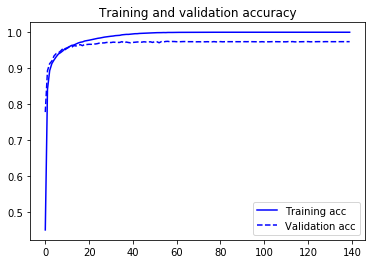

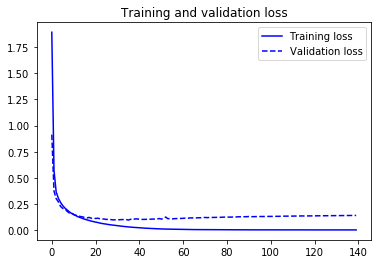

10000/10000 [==============================] - 1s 77us/step
test acc= 0.973
training accuracy= 0.9999791666666666
validation accuracy= 0.9737499998410543
test err= 0.14596334818315704
training err= 0.0007363217900274321
validation err= 0.13942046153172852


In [79]:
#avaliando
Avalia(history7,network7,test_images_mlp,test_labels,1)

# Rede 8: MLP de 4 camadas com dropout

In [80]:
#definindo rede
network8 = models.Sequential()
network8.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network8.add(layers.Dropout(0.5))
network8.add(layers.Dense(256, activation='relu'))
network8.add(layers.Dropout(0.5))
network8.add(layers.Dense(256, activation='relu'))
network8.add(layers.Dropout(0.5))
network8.add(layers.Dense(256, activation='relu'))
network8.add(layers.Dropout(0.5))
network8.add(layers.Dense(256, activation='relu'))
network8.add(layers.Dropout(0.5))
network8.add(layers.Dense(256, activation='relu'))
network8.add(layers.Dropout(0.5))
network8.add(layers.Dense(10, activation='softmax'))

network8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
__________

In [81]:
#paralelizando, compilando e treinando
network8 = keras.utils.multi_gpu_model(network8,gpus=2)
network8.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])
history8 = network8.fit(train_images_mlp, train_labels, epochs=140, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 4s 84us/step - loss: 2.3374 - acc: 0.1039 - val_loss: 2.2942 - val_acc: 0.1060
Epoch 2/140
48000/48000 [==============================] - 3s 72us/step - loss: 2.2851 - acc: 0.1303 - val_loss: 2.2808 - val_acc: 0.1311
Epoch 3/140
48000/48000 [==============================] - 3s 71us/step - loss: 2.1972 - acc: 0.2009 - val_loss: 2.1862 - val_acc: 0.2112
Epoch 4/140
48000/48000 [==============================] - 3s 72us/step - loss: 2.0744 - acc: 0.2480 - val_loss: 2.0769 - val_acc: 0.2598
Epoch 5/140
48000/48000 [==============================] - 3s 72us/step - loss: 1.9775 - acc: 0.2644 - val_loss: 1.9703 - val_acc: 0.3155
Epoch 6/140
48000/48000 [==============================] - 3s 73us/step - loss: 1.8959 - acc: 0.2825 - val_loss: 1.9142 - val_acc: 0.3275
Epoch 7/140
48000/48000 [==============================] - 3s 72us/step - loss: 1.8068 - acc: 0.3048 - val_loss: 1.8114 - 

Epoch 118/140
48000/48000 [==============================] - 3s 72us/step - loss: 0.1724 - acc: 0.9543 - val_loss: 0.1479 - val_acc: 0.9672
Epoch 119/140
48000/48000 [==============================] - 3s 72us/step - loss: 0.1716 - acc: 0.9555 - val_loss: 0.1484 - val_acc: 0.9674
Epoch 120/140
48000/48000 [==============================] - 3s 73us/step - loss: 0.1677 - acc: 0.9564 - val_loss: 0.1542 - val_acc: 0.9665
Epoch 121/140
48000/48000 [==============================] - 3s 72us/step - loss: 0.1663 - acc: 0.9560 - val_loss: 0.1547 - val_acc: 0.9661
Epoch 122/140
48000/48000 [==============================] - 3s 72us/step - loss: 0.1662 - acc: 0.9569 - val_loss: 0.1462 - val_acc: 0.9675
Epoch 123/140
48000/48000 [==============================] - 3s 72us/step - loss: 0.1716 - acc: 0.9555 - val_loss: 0.1494 - val_acc: 0.9672
Epoch 124/140
48000/48000 [==============================] - 3s 71us/step - loss: 0.1637 - acc: 0.9577 - val_loss: 0.1468 - val_acc: 0.9687
Epoch 125/140
48000/

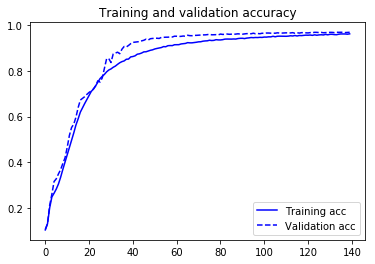

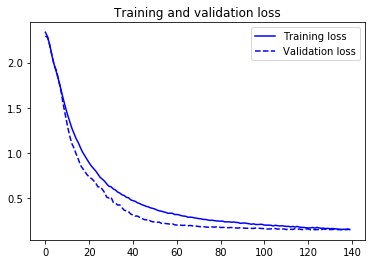

10000/10000 [==============================] - 1s 86us/step
test acc= 0.9683
training accuracy= 0.9620833333333333
validation accuracy= 0.9689166668256124
test err= 0.15233140578726306
training err= 0.148334436049064
validation err= 0.15050022852793335


In [82]:
#avaliando
Avalia(history8,network8,test_images_mlp,test_labels,1)

# Rede 9: MLP de 4 camadas com weight decay (norma L2)

In [84]:
#definindo rede

network9 = models.Sequential()
network9.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,),
                          activity_regularizer=keras.regularizers.l2(0.0001)))
network9.add(layers.Dropout(0.5))
network9.add(layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l2(0.0001)))
network9.add(layers.Dropout(0.5))
network9.add(layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l2(0.0001)))
network9.add(layers.Dropout(0.5))
network9.add(layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l2(0.0001)))
network9.add(layers.Dropout(0.5))
network9.add(layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l2(0.0001)))
network9.add(layers.Dropout(0.5))
network9.add(layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l2(0.0001)))
network9.add(layers.Dropout(0.5))
network9.add(layers.Dense(10, activation='softmax'))

network9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               262656    
__________

In [85]:
#paralelizando, compilando e treinando
network9 = keras.utils.multi_gpu_model(network9,gpus=2)
network9.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])
history9 = network9.fit(train_images_mlp, train_labels, epochs=140, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/140
48000/48000 [==============================] - 5s 101us/step - loss: 2.5081 - acc: 0.1159 - val_loss: 2.3215 - val_acc: 0.1060
Epoch 2/140
48000/48000 [==============================] - 4s 86us/step - loss: 2.3223 - acc: 0.1239 - val_loss: 2.3113 - val_acc: 0.1060
Epoch 3/140
48000/48000 [==============================] - 4s 87us/step - loss: 2.3102 - acc: 0.1202 - val_loss: 2.3085 - val_acc: 0.1060
Epoch 4/140
48000/48000 [==============================] - 4s 87us/step - loss: 2.3055 - acc: 0.1213 - val_loss: 2.3073 - val_acc: 0.1060
Epoch 5/140
48000/48000 [==============================] - 4s 86us/step - loss: 2.3018 - acc: 0.1275 - val_loss: 2.3066 - val_acc: 0.1060
Epoch 6/140
48000/48000 [==============================] - 4s 87us/step - loss: 2.2951 - acc: 0.1615 - val_loss: 2.3034 - val_acc: 0.1061
Epoch 7/140
48000/48000 [==============================] - 4s 86us/step - loss: 2.2788 - acc: 0.1949 - val_loss: 2.2868 -

Epoch 118/140
48000/48000 [==============================] - 4s 87us/step - loss: 0.8471 - acc: 0.6659 - val_loss: 0.8497 - val_acc: 0.6551
Epoch 119/140
48000/48000 [==============================] - 4s 85us/step - loss: 0.8460 - acc: 0.6637 - val_loss: 0.8423 - val_acc: 0.6565
Epoch 120/140
48000/48000 [==============================] - 4s 86us/step - loss: 0.8413 - acc: 0.6668 - val_loss: 0.8465 - val_acc: 0.6572
Epoch 121/140
48000/48000 [==============================] - 4s 87us/step - loss: 0.8423 - acc: 0.6664 - val_loss: 0.8406 - val_acc: 0.6578
Epoch 122/140
48000/48000 [==============================] - 4s 87us/step - loss: 0.8356 - acc: 0.6677 - val_loss: 0.8387 - val_acc: 0.6568
Epoch 123/140
48000/48000 [==============================] - 4s 87us/step - loss: 0.8357 - acc: 0.6681 - val_loss: 0.8476 - val_acc: 0.6555
Epoch 124/140
48000/48000 [==============================] - 4s 86us/step - loss: 0.8331 - acc: 0.6676 - val_loss: 0.8529 - val_acc: 0.6549
Epoch 125/140
48000/

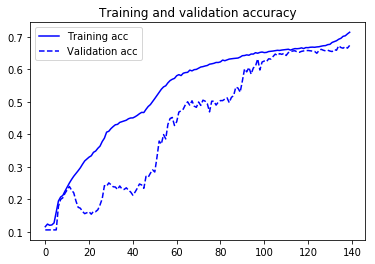

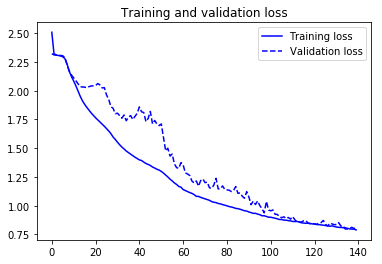

10000/10000 [==============================] - 1s 119us/step
test acc= 0.6688
training accuracy= 0.7138958333333333
validation accuracy= 0.6733333333333333
test err= 0.7766052742004395
training err= 0.7893838154474894
validation err= 0.8091879213651021


In [86]:
Avalia(history9,network9,test_images_mlp,test_labels,1)